---------------------------------------------------- Start
Point definitions
Define discretization
Define froces in points


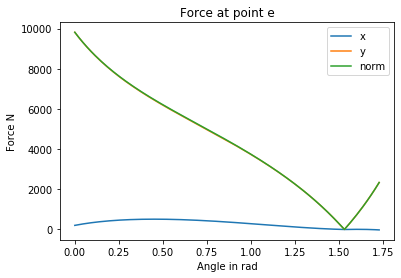

Maximum value Force e in x: 513.3030570924868 N
Maximum value Force e in y: 9817.144325615096 N
Maximum value Force e norm: 9819.281394512756 N
Value Force e at  0.0  deg Force in x: 204.8521287849057 N
Value Force e at  0.0  deg Force in y: 9817.144325615096 N
Value Force e at  0.0  deg Force norm: 9819.281394512756 N
Value Force e at  99.00000000000001  deg Force in x: -21.245346820847033 N
Value Force e at  99.00000000000001  deg Force in y: 2338.9730657274768 N
Value Force e at  99.00000000000001  deg Force norm: 2339.0695515439743 N


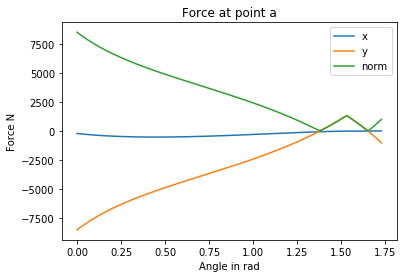

Maximum absolute value Force a in x: 513.3030570924868 N
Maximum absolute value Force a in y: 8482.984325615096 N
Maximum absolute value Force a norm: 8485.457410375655 N
Value Force a at  0.0  deg Force in x: -204.8521287849057 N
Value Force a at  0.0  deg Force in y: -8482.984325615096 N
Value Force a at  0.0  deg Force norm: 8485.457410375655 N


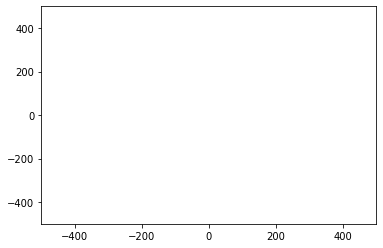

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

def compute_rotation_matrix(angle):
    rotation = np.zeros((2,2))

    rotation[0,0] = np.cos(angle)
    rotation[0,1] = -np.sin(angle)
    rotation[1,0] = np.sin(angle)
    rotation[1,1] = np.cos(angle)

    return rotation

print("---------------------------------------------------- Start")
print("Point definitions")
offset = 0
a_0 = np.array([0,                 0])
b_0 = np.array([62.5+offset,       0])
c_0 = np.array([469.49+offset,     0])
d_0 = np.array([469.49+offset, 19.01])
e_0 = np.array([62.5+offset,   -62.5])
f_0 = np.array([56+offset,      -374])

print("Define discretization")
num_steps = 150
angle = np.linspace(0, np.pi*0.55,num_steps)

print("Define froces in points")
force_a = np.zeros((num_steps, 2))
force_d = np.zeros((num_steps, 2))
force_e = np.zeros((num_steps, 2))
force_d[:, 1] = -85*1.6*9.81

for i, alpha in enumerate(angle):
    rotation = compute_rotation_matrix(alpha)
    d = rotation.dot(d_0)
    e = rotation.dot(e_0)
    e_unit = e /  np.linalg.norm(e)
    fe = e - f_0
    fe_unit = fe /  np.linalg.norm(fe)
    sin_theta = np.cross(e_unit, fe_unit)

    force_e_norm = np.abs((np.cross(d,force_d[i, :]))/ (np.linalg.norm(e)*sin_theta))
    force_e[i] = force_e_norm * fe_unit

    force_a = -(force_e + force_d)

#-------------------------------
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
# Plot force by components X and Y at point e, also the norm
norm_force_e = np.zeros((num_steps,1))
for i, force in enumerate(force_e):
    norm_force_e[i] = np.linalg.norm(force)
fig, ax1 = plt.subplots()
plt.plot(angle, force_e[:,0], label='x')
plt.plot(angle, force_e[:,1], label='y')
plt.plot(angle, norm_force_e, label='norm')
ax1.set_ylabel('Force N')
ax1.set_xlabel('Angle in rad')
plt.legend()
plt.title('Force at point e')
plt.savefig('forces_e_norm.pdf')
plt.show()

print('Maximum value Force e in x:', np.amax(force_e[:,0]),'N')
print('Maximum value Force e in y:', np.amax(force_e[:,1]),'N')
print('Maximum value Force e norm:', np.amax(norm_force_e),'N')

print('Value Force e at ', np.degrees(angle[0]), ' deg Force in x:', np.amax(force_e[0,0]),'N')
print('Value Force e at ', np.degrees(angle[0]), ' deg Force in y:', np.amax(force_e[0,1]),'N')
print('Value Force e at ', np.degrees(angle[0]), ' deg Force norm:', np.amax(norm_force_e[0]),'N')

print('Value Force e at ', np.degrees(angle[-1]), ' deg Force in x:', np.amax(force_e[-1,0]),'N')
print('Value Force e at ', np.degrees(angle[-1]), ' deg Force in y:', np.amax(force_e[-1,1]),'N')
print('Value Force e at ', np.degrees(angle[-1]), ' deg Force norm:', np.amax(norm_force_e[-1]),'N')

#------------------------------- Plot reaction force in a only X and Y
norm_force_a = np.zeros((num_steps,1))
for i, force in enumerate(force_a):
    norm_force_a[i] = np.linalg.norm(force)
fig, ax1 = plt.subplots()
plt.plot(angle, force_a[:,0], label='x')
plt.plot(angle, force_a[:,1], label='y')
plt.plot(angle, norm_force_a, label='norm')
ax1.set_ylabel('Force N')
ax1.set_xlabel('Angle in rad')
plt.legend()
plt.title('Force at point a')
plt.savefig('forces_a.pdf')
plt.show()

print('Maximum absolute value Force a in x:', np.amax(np.abs(force_a[:,0])),'N')
print('Maximum absolute value Force a in y:', np.amax(np.abs(force_a[:,1])),'N')
print('Maximum absolute value Force a norm:', np.amax(np.abs(norm_force_a)),'N')
print('Value Force a at ', np.degrees(angle[0]), ' deg Force in x:', np.amax(force_a[0,0]),'N')
print('Value Force a at ', np.degrees(angle[0]), ' deg Force in y:', np.amax(force_a[0,1]),'N')
print('Value Force a at ', np.degrees(angle[0]), ' deg Force norm:', np.amax(norm_force_a[0]),'N')

#------------------------------- Start animation
fig2, ax = plt.subplots()
ax.set_xlim(np.min(force_e[:,1]), np.max(force_e[:,1]))
ax.set_ylim(np.min(force_e[:,1]), np.max(force_e[:,1]))
ax.set_xlim(-500, 500)
ax.set_ylim(-500, 500)
angle_template = r'angle = %.1f $^\circ$'
angle_text = ax.text(0.68, 0.9, '', transform=ax.transAxes)
force_template = r'force = %.1f $N$'
force_text = ax.text(0.68, 0.8, '', transform=ax.transAxes)

xdata = np.zeros((1,2))
ydata = np.zeros((1,2))
line_force_e, = plt.plot([], [], '-r', linewidth = 4)

data = np.zeros((2,5))
body, = plt.plot([], [], '-ko', markersize = 4, linewidth = 2)

data2 = np.zeros((2,2))
data2[0,0] = f_0[0]
data2[1,0] = f_0[1]
spindle, = plt.plot([], [], '--bo', linewidth = 1)


def init():
    body.set_data([],[])
    line_force_e.set_data([],[])
    angle_text.set_text('')
    force_text.set_text('')
    return 

def update(i):
    rotation = compute_rotation_matrix(angle[i])
    data[0,0] = rotation.dot(a_0)[0]
    data[0,1] = rotation.dot(d_0)[0]
    data[0,2] = rotation.dot(c_0)[0]
    data[0,3] = rotation.dot(e_0)[0]
    data[0,4] = rotation.dot(a_0)[0]
    
    data[1,0] = rotation.dot(a_0)[1]
    data[1,1] = rotation.dot(d_0)[1]
    data[1,2] = rotation.dot(c_0)[1]
    data[1,3] = rotation.dot(e_0)[1]
    data[1,4] = rotation.dot(a_0)[1]

    body.set_data(data[0], data[1])
    # ------------------------------------------------------ 

    xdata[0,0] = rotation.dot(e_0)[0]
    ydata[0,0] = rotation.dot(e_0)[1]

    scale_force = 0.05
    xdata[0,1] = force_e[i,0] * scale_force + rotation.dot(e_0)[0]
    ydata[0,1] = force_e[i,1] * scale_force + rotation.dot(e_0)[1]
    line_force_e.set_data(xdata, ydata)
    # ------------------------------------------------------ 
    data2[0,1] = rotation.dot(e_0)[0]
    data2[1,1] = rotation.dot(e_0)[1]
    spindle.set_data(data2[0], data2[1])


    angle_text.set_text(angle_template % np.degrees(angle[i]))
    force_text.set_text(force_template % np.linalg.norm(force_e[i]))    
    return 

ani = FuncAnimation(fig2, update, num_steps,
                    init_func=init, interval=20, blit=False)
plt.show()

ani.save('force.gif', writer='imagemagick')

